In [3]:
# ======================================
# STEP 1: IMPORT LIBRARIES
# ======================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting
%matplotlib inline

# ======================================
# STEP 2: LOAD DATA
# ======================================
df = pd.read_csv('../data/raw/heart.csv')

# Display the first few rows
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [4]:
# ======================================
# STEP 4: CHECK MISSING VALUES
# ======================================
missing = df.isnull().sum()
print("Missing Values per Column:\n", missing[missing > 0])

Missing Values per Column:
 Series([], dtype: int64)


In [5]:
# ======================================
# STEP 5: RENAME COLUMNS
# ======================================

df.columns = [
    'Age', 'Sex', 'Chest_Pain_Type', 'Resting_BP', 'Cholesterol', 
    'Fasting_BS', 'Resting_ECG', 'Max_Heart_Rate', 'Exercise_Angina',
    'ST_Depression', 'Slope', 'Major_Vessels', 'Thalassemia', 'Heart_Disease'
]

df.head()

,Age,Sex,Chest_Pain_Type,Resting_BP,Cholesterol,Fasting_BS,Resting_ECG,Max_Heart_Rate,Exercise_Angina,ST_Depression,Slope,Major_Vessels,Thalassemia,Heart_Disease
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


C:\Users\Admin\AppData\Local\Temp\ipykernel_9628\1345384082.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


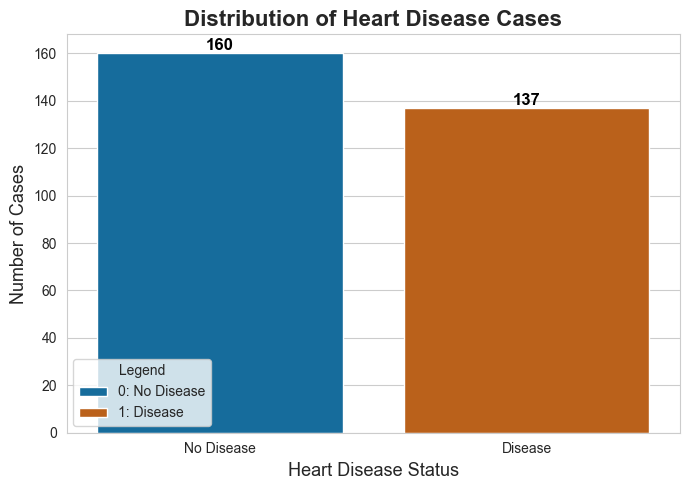

In [6]:
# ======================================
# IMPROVED HEART DISEASE DISTRIBUTION PLOT
# ======================================

plt.figure(figsize=(7, 5))
sns.set_style("whitegrid")

# Define label mapping for the target
label_map = {0: 'No Disease', 1: 'Disease'}
df['Heart_Disease_Label'] = df['Heart_Disease'].map(label_map)

ax = sns.countplot(
    x='Heart_Disease_Label', 
    data=df, 
    palette=['#0072B2', '#D55E00']
)

# Add value labels above bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                fontsize=12, fontweight='bold', color='black')

plt.title('Distribution of Heart Disease Cases', fontsize=16, weight='bold')
plt.xlabel('Heart Disease Status', fontsize=13)
plt.ylabel('Number of Cases', fontsize=13)
plt.legend(
    handles=ax.patches, 
    labels=[f"{k}: {v}" for k, v in label_map.items()],
    title="Legend"
)
plt.tight_layout()
plt.show()

In [7]:
# ======================================
# STEP 7: SAVE CLEANED DATA
# ======================================
df.to_csv('../data/processed/heart_cleaned.csv', index=False)
print("✅ Cleaned dataset saved as '../data/processed/heart_cleaned.csv'")

✅ Cleaned dataset saved as '../data/processed/heart_cleaned.csv'


In [8]:
# ======================================
# PHASE 3: EXPLORATORY DATA ANALYSIS (EDA)
# ======================================

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv('../data/processed/heart_cleaned.csv')

# Set style
sns.set(style='whitegrid')

C:\Users\Admin\AppData\Local\Temp\ipykernel_9628\3511819390.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


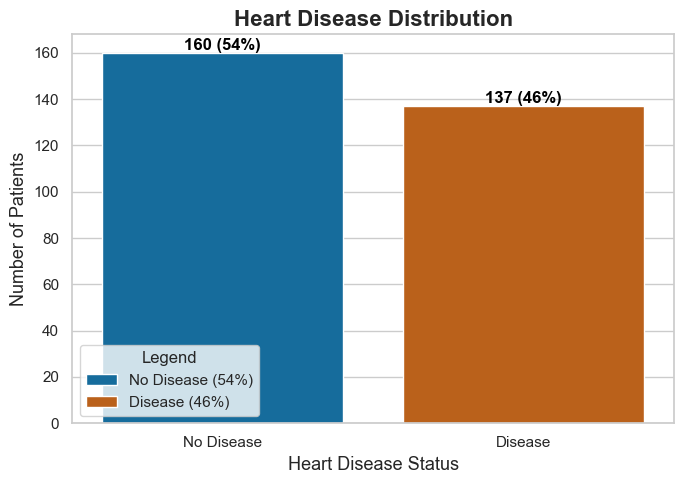

Heart Disease Class Distribution (%):
  No Disease: 54%
  Disease: 46%


In [9]:
# ======================================
# IMPROVED TARGET DISTRIBUTION PLOT WITH PERCENTAGES
# ======================================

plt.figure(figsize=(7, 5))
sns.set_style("whitegrid")
label_map = {0: 'No Disease', 1: 'Disease'}
df['Heart_Disease_Label'] = df['Heart_Disease'].map(label_map)
counts = df['Heart_Disease_Label'].value_counts()
percentages = df['Heart_Disease_Label'].value_counts(normalize=True) * 100

colors = ['#0072B2', '#D55E00']
ax = sns.countplot(
    x='Heart_Disease_Label',
    data=df,
    palette=colors
)

# Annotate exact number and percent on each bar
for p, label in zip(ax.patches, counts.index):
    count = int(counts[label])
    percent = int(round(percentages[label]))
    ax.annotate(f'{count} ({percent}%)',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

plt.title('Heart Disease Distribution', fontsize=16, weight='bold')
plt.xlabel('Heart Disease Status', fontsize=13)
plt.ylabel('Number of Patients', fontsize=13)
legend_labels = [f"{label} ({int(round(percentages[label]))}%)" for label in counts.index]
plt.legend(
    handles=ax.patches,
    labels=legend_labels,
    title="Legend"
)
plt.tight_layout()
plt.show()

# Print frequencies in whole % (as int)
print("Heart Disease Class Distribution (%):")
for label, pct in percentages.items():
    print(f"  {label}: {int(round(pct))}%")

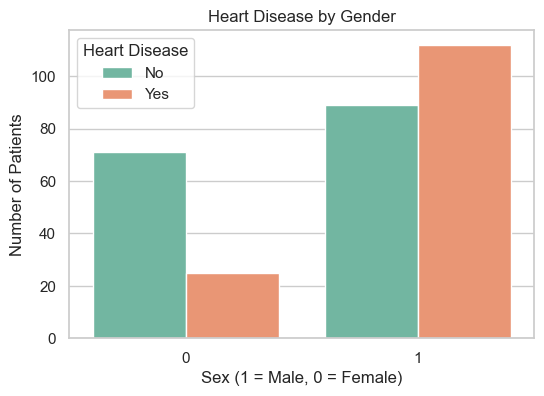

In [10]:
# ======================================
# HEART DISEASE BY GENDER
# ======================================
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='Heart_Disease', data=df, palette='Set2')
plt.title('Heart Disease by Gender')
plt.xlabel('Sex (1 = Male, 0 = Female)')
plt.ylabel('Number of Patients')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()


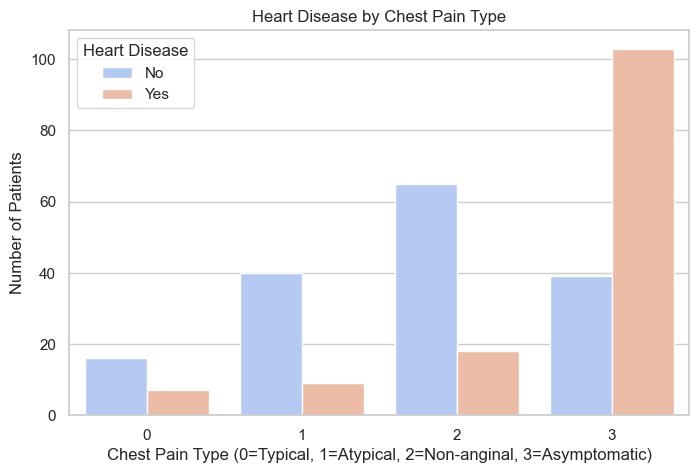

In [11]:
# ======================================
# CHEST PAIN TYPE VS HEART DISEASE
# ======================================
plt.figure(figsize=(8,5))
sns.countplot(x='Chest_Pain_Type', hue='Heart_Disease', data=df, palette='coolwarm')
plt.title('Heart Disease by Chest Pain Type')
plt.xlabel('Chest Pain Type (0=Typical, 1=Atypical, 2=Non-anginal, 3=Asymptomatic)')
plt.ylabel('Number of Patients')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

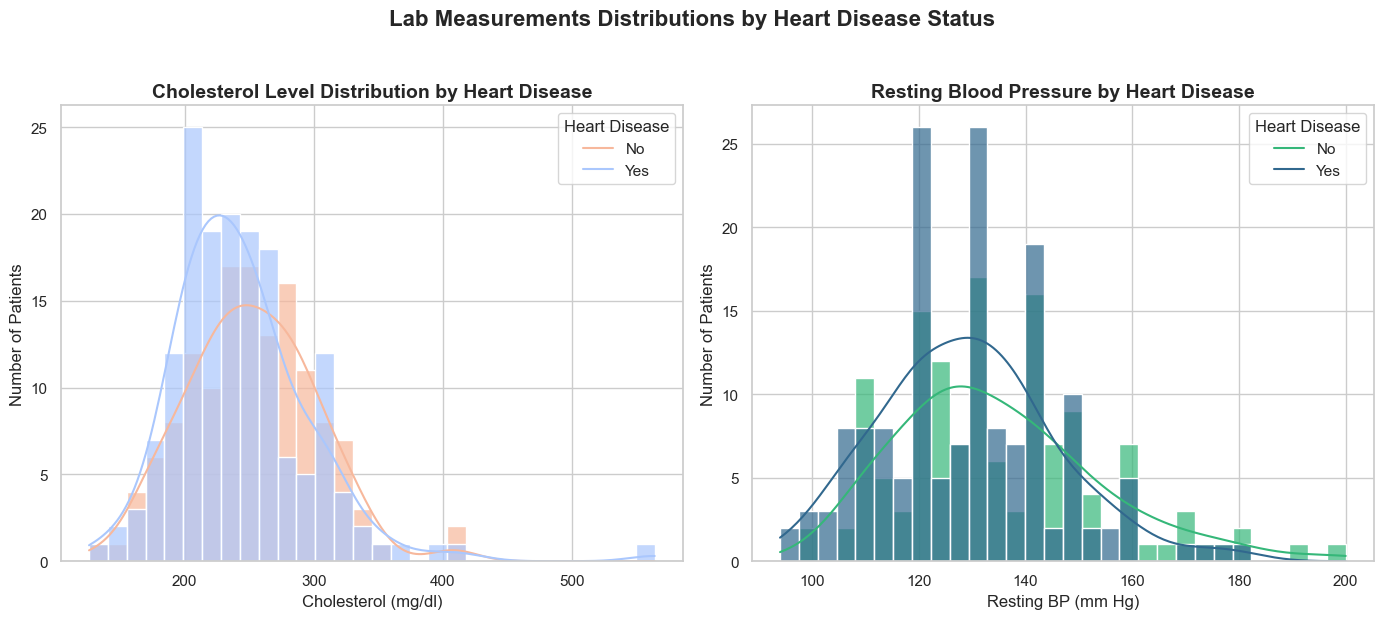

In [12]:
# ======================================
# ENHANCED CHOLESTEROL AND BLOOD PRESSURE DISTRIBUTIONS (COUNTS)
# ======================================
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.set_style("whitegrid")

# Cholesterol distribution by heart disease (counts)
sns.histplot(
    data=df,
    x='Cholesterol',
    hue='Heart_Disease',
    palette='coolwarm',
    kde=True,
    stat='count',         # Show counts instead of percent
    common_norm=False,
    bins=30,
    alpha=0.7,
    ax=axes[0],
    legend=True
)
axes[0].set_title('Cholesterol Level Distribution by Heart Disease', fontsize=14, weight='bold')
axes[0].set_xlabel('Cholesterol (mg/dl)', fontsize=12)
axes[0].set_ylabel('Number of Patients', fontsize=12)
axes[0].legend(title='Heart Disease', labels=['No', 'Yes'])

# Resting BP distribution by heart disease (counts)
sns.histplot(
    data=df,
    x='Resting_BP',
    hue='Heart_Disease',
    palette='viridis',
    kde=True,
    stat='count',         # Show counts instead of percent
    common_norm=False,
    bins=30,
    alpha=0.7,
    ax=axes[1],
    legend=True
)
axes[1].set_title('Resting Blood Pressure by Heart Disease', fontsize=14, weight='bold')
axes[1].set_xlabel('Resting BP (mm Hg)', fontsize=12)
axes[1].set_ylabel('Number of Patients', fontsize=12)
axes[1].legend(title='Heart Disease', labels=['No', 'Yes'])

plt.suptitle('Lab Measurements Distributions by Heart Disease Status', fontsize=16, weight='bold', y=1.03)
plt.tight_layout()
plt.show()

### Interpretation of Cholesterol and Resting Blood Pressure Distributions

The above charts illustrate the distribution of cholesterol levels and resting blood pressure among patients, grouped by heart disease status.

- **Cholesterol Distribution:**  
  Both patients with and without heart disease show a wide range of cholesterol levels. However, there is a noticeable concentration of heart disease patients in the higher cholesterol range. This suggests that elevated cholesterol may have an association with heart disease risk in this cohort, but overlap between groups indicates it is not an exclusive predictor.

- **Resting Blood Pressure Distribution:**  
  Resting blood pressure values are relatively similar across both groups, with a moderate peak around common normal to slightly elevated values. While extremely high or low blood pressure is less common, no clear separation between heart disease absence or presence is observed based solely on resting blood pressure.

**Summary:**  
Elevated cholesterol appears to be more strongly associated with heart disease in this dataset than resting blood pressure, but both variables alone do not perfectly distinguish between those with and without heart disease. Multiple factors likely contribute to overall heart disease risk.

C:\Users\Admin\AppData\Local\Temp\ipykernel_9628\4143982435.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Heart_Disease', y='Max_Heart_Rate', data=df, palette='Set3')


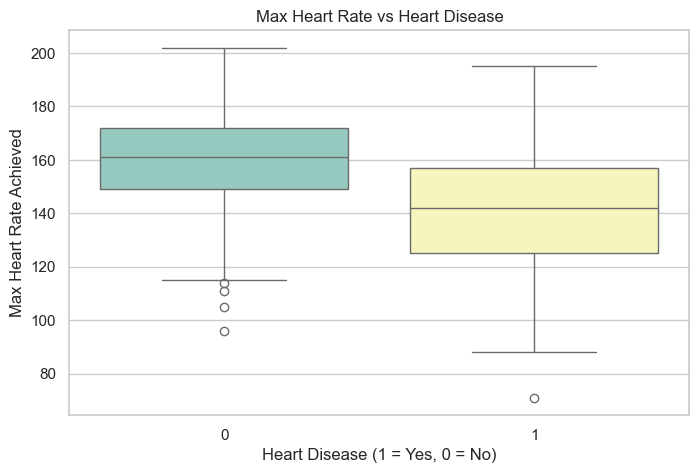

In [13]:
# ======================================
# EXERCISE AND HEART RATE
# ======================================
plt.figure(figsize=(8,5))
sns.boxplot(x='Heart_Disease', y='Max_Heart_Rate', data=df, palette='Set3')
plt.title('Max Heart Rate vs Heart Disease')
plt.xlabel('Heart Disease (1 = Yes, 0 = No)')
plt.ylabel('Max Heart Rate Achieved')
plt.show()


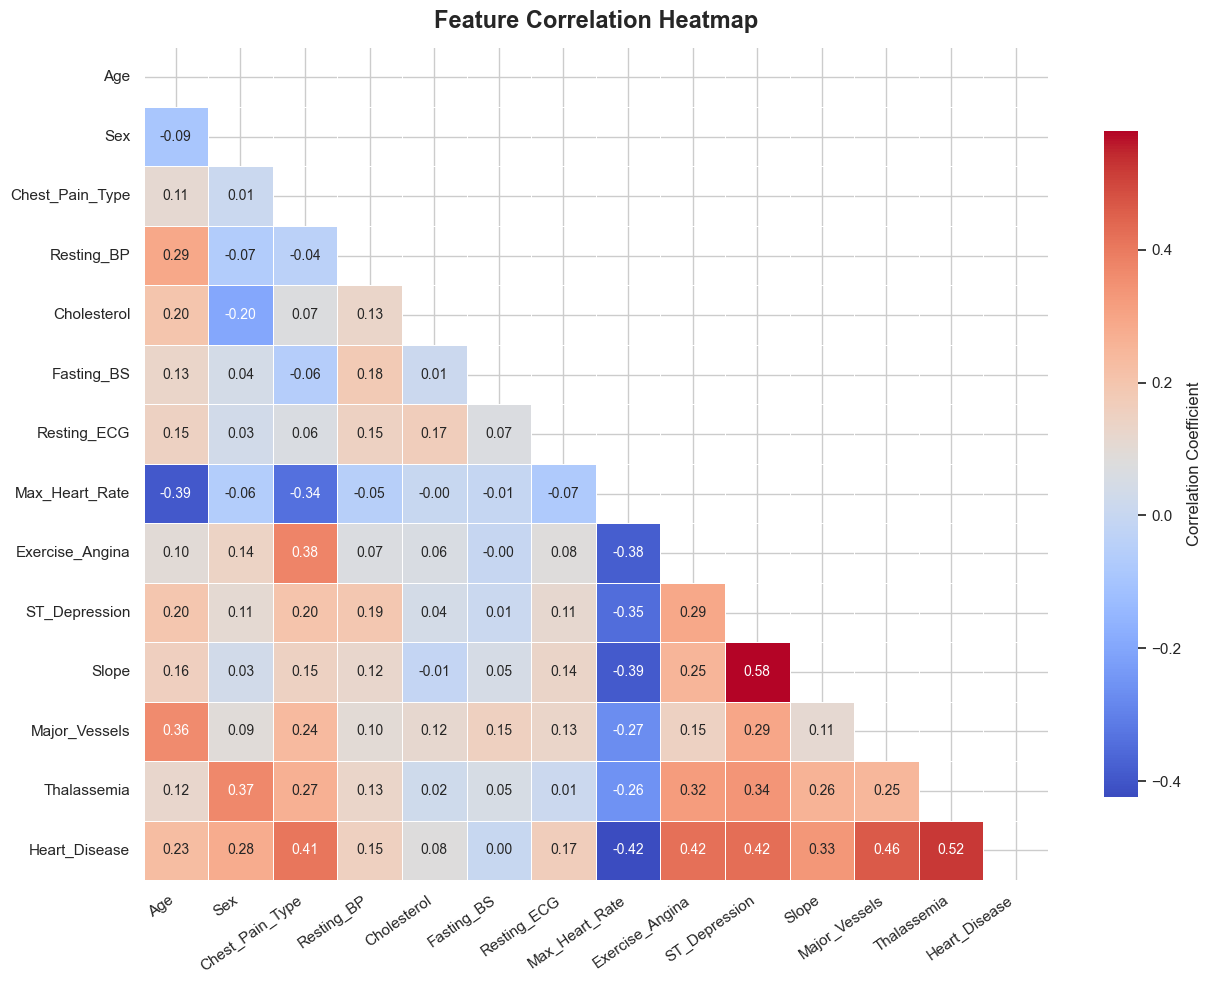

In [14]:
# ======================================
# ENHANCED CORRELATION MATRIX HEATMAP
# ======================================
plt.figure(figsize=(13, 10))
corr = df.corr(numeric_only=True)

mask = np.triu(np.ones_like(corr, dtype=bool))  # Mask upper triangle for cleaner look

sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    cmap='coolwarm',   # keeps your palette
    fmt='.2f',
    annot_kws={'size': 10},
    linewidths=0.5,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'}
)

plt.title('Feature Correlation Heatmap', fontsize=17, weight='bold', pad=14)
plt.xticks(rotation=35, ha='right', fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_9628\2682967360.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Heart_Disease', data=df, palette='Reds')


✅ Visualization saved to '../reports/visualizations/'


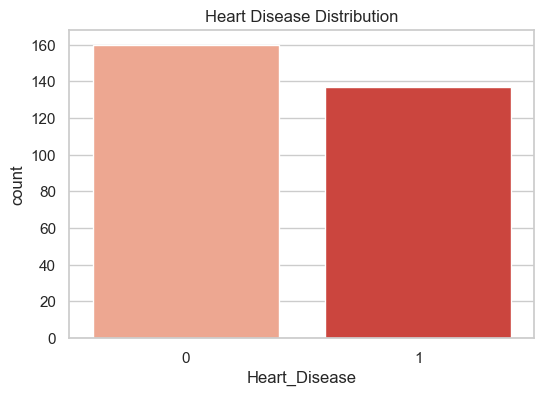

In [15]:
# ======================================
# SAVE VISUALIZATIONS
# ======================================
plt.figure(figsize=(6,4))
sns.countplot(x='Heart_Disease', data=df, palette='Reds')
plt.title('Heart Disease Distribution')
plt.savefig('../reports/visualizations/heart_disease_distribution.png', bbox_inches='tight')

print("✅ Visualization saved to '../reports/visualizations/'")

In [16]:
# ======================================
# STEP: SAVE FINAL PROCESSED DATA
# ======================================

import pandas as pd
import os

# Load the cleaned dataset
df = pd.read_csv('../data/processed/heart_cleaned.csv')

# Drop the redundant label column if it exists
if 'Heart_Disease_Label' in df.columns:
    df = df.drop('Heart_Disease_Label', axis=1)
    print("🗑️ Dropped column: 'Heart_Disease_Label'")


# Save the new version
df.to_csv('../data/processed/heart_final.csv', index=False)
print("✅ Final processed dataset saved successfully as '../data/processed/heart_final.csv'")

# Check shape and columns
print("\nDataset Shape:", df.shape)
print("Columns:", df.columns.tolist())


🗑️ Dropped column: 'Heart_Disease_Label'
✅ Final processed dataset saved successfully as '../data/processed/heart_final.csv'

Dataset Shape: (297, 14)
Columns: ['Age', 'Sex', 'Chest_Pain_Type', 'Resting_BP', 'Cholesterol', 'Fasting_BS', 'Resting_ECG', 'Max_Heart_Rate', 'Exercise_Angina', 'ST_Depression', 'Slope', 'Major_Vessels', 'Thalassemia', 'Heart_Disease']


In [25]:
# ======================================
# STEP 2: LOAD FINAL DATASET & SPLIT
# ======================================
from sklearn.model_selection import train_test_split


# Load the final processed dataset
df = pd.read_csv('../data/processed/heart_final.csv')

# Define features (X) and target (y)
X = df.drop('Heart_Disease', axis=1)
y = df['Heart_Disease']


# Split the data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("✅ Data loaded and split successfully.")
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


✅ Data loaded and split successfully.
Training set shape: (237, 13)
Testing set shape: (60, 13)


In [ ]:
# ======================================
# STEP 3: TRAIN MODELS & EVALUATE PERFORMANCE
# ======================================

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize models
log_reg = LogisticRegression(max_iter=1000, random_state=42)
rf = RandomForestClassifier(random_state=42)

# Train both models
log_reg.fit(X_train, y_train)
rf.fit(X_train, y_train)
# Make predictions
y_pred_log = log_reg.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Evaluate performance
accuracy_log = accuracy_score(y_test, y_pred_log)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Print model accuracies
print("Model\t\t\tAccuracy")
print(f"Logistic Regression\t{accuracy_log:.4f}")
print(f"Random Forest\t\t{accuracy_rf:.4f}")


Model			Accuracy
Logistic Regression	0.9167
Random Forest		0.8833


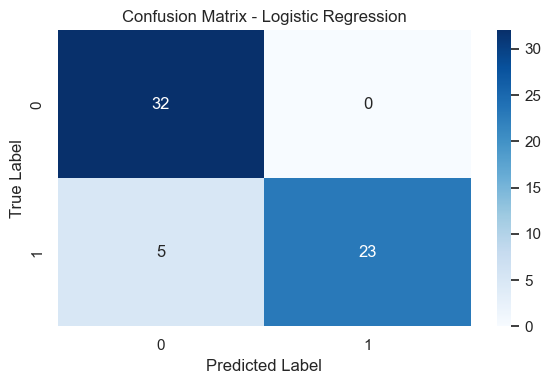

Classification Report:

              precision    recall  f1-score   support

           0       0.86      1.00      0.93        32
           1       1.00      0.82      0.90        28

    accuracy                           0.92        60
   macro avg       0.93      0.91      0.91        60
weighted avg       0.93      0.92      0.92        60



In [28]:
# ======================================
# STEP 4: CONFUSION MATRIX & CLASSIFICATION REPORT
# ======================================

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_log)

# Visualize it
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Save confusion matrix plot
plt.tight_layout()
plt.savefig("../reports/visualizations/confusion_matrix_logreg.png")
plt.show()

# Print evaluation report
print("Classification Report:\n")
print(classification_report(y_test, y_pred_log))


Top 10 Important Features:

            Feature  Importance
11    Major_Vessels    1.046562
8   Exercise_Angina    0.812754
1               Sex    0.676534
12      Thalassemia    0.623148
5        Fasting_BS    0.584302
2   Chest_Pain_Type    0.497898
9     ST_Depression    0.378907
10            Slope    0.321418
6       Resting_ECG    0.139815
7    Max_Heart_Rate    0.023154


C:\Users\Admin\AppData\Local\Temp\ipykernel_9628\703654369.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10), palette='viridis')


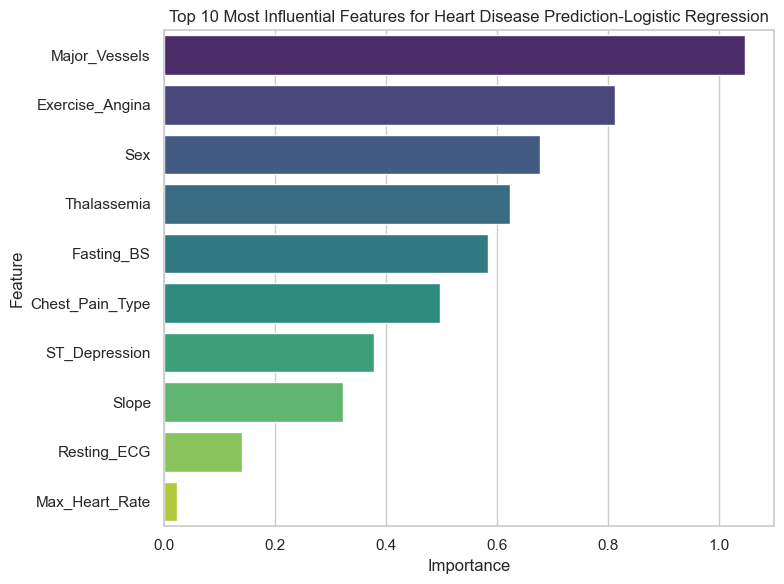

In [39]:
# ======================================
# PHASE 5: FEATURE IMPORTANCE (LOGISTIC REGRESSION)
# ======================================

import numpy as np
import pandas as pd

# Get feature importance from logistic regression coefficients
importance = log_reg.coef_[0]
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(importance)
}).sort_values(by='Importance', ascending=False)

# Display top 10 important features
print("Top 10 Important Features:\n")
print(feature_importance.head(10))

# Plot feature importance
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10), palette='viridis')
plt.title("Top 10 Most Influential Features for Heart Disease Prediction-Logistic Regression")
plt.tight_layout()
plt.savefig("../reports/visualizations/feature_importance_logreg.png")
plt.show()


Top 10 Most Important Features (Random Forest Classifier):

            Feature  Importance
7    Max_Heart_Rate    0.158690
2   Chest_Pain_Type    0.123382
9     ST_Depression    0.115131
11    Major_Vessels    0.109056
0               Age    0.095799
12      Thalassemia    0.091850
4       Cholesterol    0.080161
3        Resting_BP    0.078338
8   Exercise_Angina    0.051173
10            Slope    0.040976


C:\Users\Admin\AppData\Local\Temp\ipykernel_9628\1546898671.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=rf_importances.head(10), palette='crest')


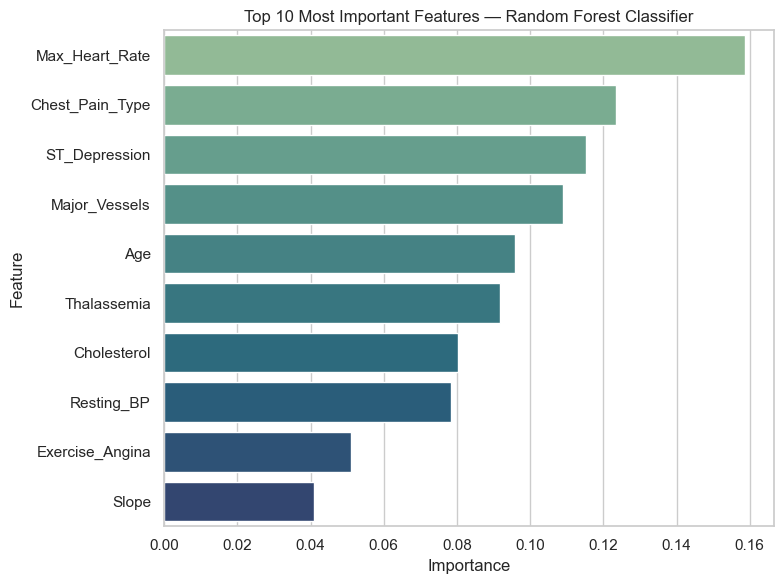

In [38]:
# ======================================
# PHASE 5B: FEATURE IMPORTANCE - RANDOM FOREST CLASSIFIER
# ======================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract feature importances
rf_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display top 10
print("Top 10 Most Important Features (Random Forest Classifier):\n")
print(rf_importances.head(10))

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=rf_importances.head(10), palette='crest')
plt.title("Top 10 Most Important Features — Random Forest Classifier")
plt.tight_layout()
plt.savefig("../reports/visualizations/feature_importance_randomforest.png")
plt.show()


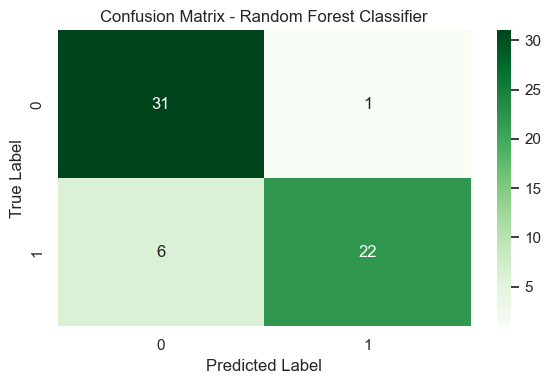

Classification Report (Random Forest Classifier):

              precision    recall  f1-score   support

           0       0.84      0.97      0.90        32
           1       0.96      0.79      0.86        28

    accuracy                           0.88        60
   macro avg       0.90      0.88      0.88        60
weighted avg       0.89      0.88      0.88        60



In [41]:
# ======================================
# CONFUSION MATRIX - RANDOM FOREST CLASSIFIER
# ======================================

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Generate confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Save confusion matrix plot
plt.tight_layout()
plt.savefig("../reports/visualizations/confusion_matrix_randomforest.png")
plt.show()

# Print classification report
print("Classification Report (Random Forest Classifier):\n")
print(classification_report(y_test, y_pred_rf))


In [4]:
# ======================================
# PHASE 6: SAVE TRAINED MODELS
# ======================================

import joblib
import os

# Create the models folder if it doesn’t exist
os.makedirs("../models", exist_ok=True)

# Save both models
joblib.dump(log_reg, "../models/logistic_regression_model.pkl")
joblib.dump(rf, "../models/random_forest_model.pkl")

print("✅ Models saved successfully!")
print("Saved files:")
print(" - logistic_regression_model.pkl")
print(" - random_forest_model.pkl")


✅ Models saved successfully!
Saved files:
 - logistic_regression_model.pkl
 - random_forest_model.pkl


In [ ]:
import os
print("Current working directory:", os.getcwd())
print("Contents of current directory:", os.listdir())
print("Contents of parent directory:", os.listdir(".."))

Current working directory: c:\Users\Admin\Desktop\ML PROJECTS\Heart Disease Prediction\notebooks
Contents of current directory: ['.ipynb_checkpoints', '01_heart_disease_analysis.ipynb']
Contents of parent directory: ['app', 'data', 'models', 'notebooks', 'reports', 'requirements.txt', 'venv']


In [8]:
import pandas as pd
import numpy as np

importance = log_reg.coef_[0]
rf_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)= 



# Combining Equally
combine_importance= (importance + rf_importances) / 2

print(combine_importance)

SyntaxError: cannot assign to function call (1129650532.py, line 5)